## Data Manipulation

### Import Data

In [2]:
import os             
import glob
import pandas as pd
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
from datetime import timedelta
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
%matplotlib inline

In [6]:
os.chdir('data')
##### get all the files that contain ".csv" #######
all_path = glob.glob( '*/**.csv' )
len(all_path)

1360

In [202]:
##### sample of the path
all_path[0:2]

['1_co_P13/12_600back_Block3_trial_012.csv',
 '1_co_P13/20_600back_Block5_trial_020.csv']

In [230]:
######## put all data into one file and add datetime column ########
dfs = []
for file in all_path:
    df = pd.read_csv(file, low_memory=False)
    df['peopleName'] = file[:8]
    df['trialName'] = file[9:]
    df['peopleTrialKey'] = file
    
    ### add a datatime column into the data
    df['datetime'] = '1970-01-01'
    df['datetimeNew'] = pd.to_datetime(df['datetime']) + pd.to_timedelta(df[';seconds'], unit='s')
    
    ### calculate new velocity
    df['seconds_shift1'] = df[';seconds'].shift(1)
    df['currentPosRoll_shift'] = df['currentPosRoll'].shift(1)
    df['calculated_vel'] = (df['currentPosRoll'] - df['currentPosRoll_shift'] )/ (df[';seconds'] - df['seconds_shift1'])
    df.dropna(inplace=True)
    df.drop(['datetime', 'seconds_shift1','currentPosRoll_shift'], axis=1, inplace=True)

    dfs.append(df)
data_all = pd.concat(dfs, ignore_index=True)
data_all = data_all.rename(columns={";seconds": "seconds"})
data_all.head()

,seconds,trialNumber,trialPhase,dirOfBalanceRoll,dirOfBalancePitch,dirOfBalanceYaw,movingDOBRoll,movingDOBPitch,movingDOBYaw,currentPosRoll,...,joystickBlanked,joystickPress,noiseRoll,noisePitch,noiseYaw,peopleName,trialName,peopleTrialKey,datetimeNew,calculated_vel
0,0.031,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.031,0.0
1,0.043,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.043,0.0
2,0.051,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.051,0.0
3,0.059,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.059,0.0
4,0.069,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.069,0.0


In [233]:
data_all[['currentVelRoll','calculated_vel']].tail()

,currentVelRoll,calculated_vel
9725516,-67.162342,-44.319846
9725517,-64.158275,-49.830845
9725518,-63.428716,-46.317361
9725519,-61.197124,-50.187544
9725520,-60.639226,-53.362165


In [430]:
####### save data into one csv file #######
data_all.to_csv('data_all.csv')

In [248]:
####### all data information #######
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9725521 entries, 0 to 9725520
Data columns (total 36 columns):
 #   Column             Dtype         
---  ------             -----         
 0   seconds            float64       
 1   trialNumber        int64         
 2   trialPhase         int64         
 3   dirOfBalanceRoll   int64         
 4   dirOfBalancePitch  int64         
 5   dirOfBalanceYaw    int64         
 6   movingDOBRoll      int64         
 7   movingDOBPitch     int64         
 8   movingDOBYaw       int64         
 9   currentPosRoll     float64       
 10  currentPosPitch    float64       
 11  currentPosYaw      int64         
 12  currentVelRoll     float64       
 13  currentVelPitch    float64       
 14  currentVelYaw      int64         
 15  calcPosRoll        float64       
 16  calcPosPitch       float64       
 17  calcPosYaw         int64         
 18  calcVelRoll        float64       
 19  calcVelPitch       float64       
 20  calcVelYaw         int64

## Data Manipulation

### choose needed columns

In [3]:
data_all = pd.read_csv('data/data_all.csv')

##### extract all needed columns ######
neededCols = ['seconds','trialPhase','currentPosRoll','currentVelRoll','calculated_vel',\
              'joystickX', 'peopleName', 'trialName', 'peopleTrialKey', 'datetimeNew']

data_needed = data_all[neededCols]
data_needed['datetimeNew'] = pd.to_datetime(data_needed['datetimeNew'])
data_needed = data_needed[data_needed.trialPhase!=1]
data_needed.set_index('datetimeNew', inplace =True)
data_needed.tail(5)

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey
datetimeNew,,,,,,,,,
1970-01-01 00:01:53.298,113.298,3,14.955139,-67.162342,-44.319846,0.000000,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv
1970-01-01 00:01:53.319,113.319,3,13.908691,-64.158275,-49.830845,0.000000,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv
1970-01-01 00:01:53.341,113.341,3,12.889709,-63.428716,-46.317361,0.000000,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv
1970-01-01 00:01:53.363,113.363,3,11.785583,-61.197124,-50.187544,-0.000031,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv
1970-01-01 00:01:53.384,113.384,3,10.664978,-60.639226,-53.362165,-0.000031,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv


## checking calculated velocity

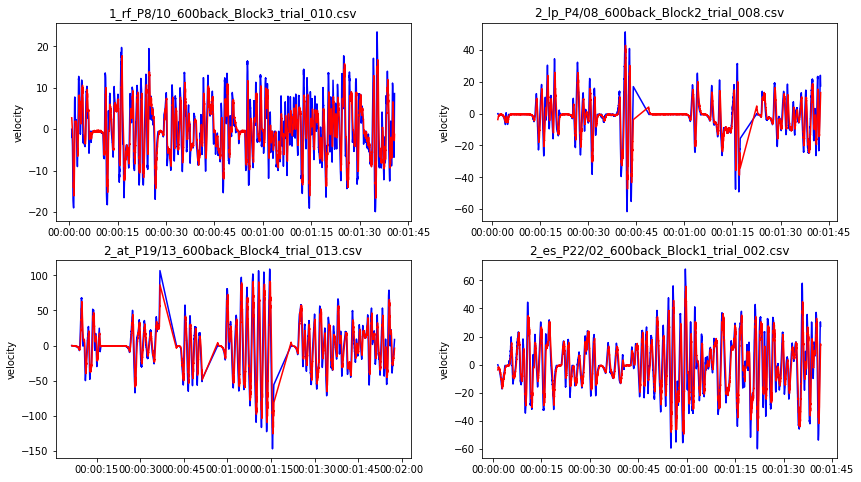

In [6]:
random_path = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(14,8), squeeze = False)
for i, path in enumerate(random_path):
    data = data_needed[data_needed.peopleTrialKey == path]
    x = data.index
    y1 = data.currentVelRoll
    y2 = data.calculated_vel
    ax = axes[i//2, i%2]
    ax.plot(x,y1,color='blue')
    ax.plot(x,y2,color='red')
    ax.set_title(path)
    ax.set_ylabel("velocity")

Both machine velocity and calculated velocity are quite similar over all, even though there might be some outliers in machine velocity which have big gap compare to calculated velocity. So, the calculated velocity is usable to solve the machine delay issue. (30-40ms)

## Try define the crash on different criteria

In [8]:
###### time -1 on 'joystickX' column
data_needed['joystickX'] = data_needed['joystickX']*-1

data_test = data_needed

###### flag crash event as 1 based on "currentPosRoll"
data_test.loc[ (data_test['trialPhase']==4)&\
                ( (data_test['currentPosRoll']>=60) | (data_test['currentPosRoll']<=-60) ), 'crash']  = 1
data_test['crash'].fillna(0, inplace=True)

data_test.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey,crash
datetimeNew,,,,,,,,,,
1970-01-01 00:00:01.774,1.774,3,-0.829468,0.000000,3.662109,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.795,1.795,3,-0.760803,-0.171661,3.269741,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.817,1.817,3,-0.686646,-0.514983,3.370805,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.838,1.838,3,-0.620728,-0.514983,3.138951,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.860,1.860,3,-0.560303,-0.686644,2.746582,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0


In [9]:
###### find all the flagged crash events
# crash_event = data_test[data_test.peopleTrialKey.isin(all_path)]

##### excluding the trialPhase=1 and the left are human being behavior 
data_human = data_test[data_test.trialPhase!=1]
data_human.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey,crash
datetimeNew,,,,,,,,,,
1970-01-01 00:00:01.774,1.774,3,-0.829468,0.000000,3.662109,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.795,1.795,3,-0.760803,-0.171661,3.269741,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.817,1.817,3,-0.686646,-0.514983,3.370805,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.838,1.838,3,-0.620728,-0.514983,3.138951,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.860,1.860,3,-0.560303,-0.686644,2.746582,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0


In [10]:
##### define crash event by trialPhase 
crashed_on_trialPhase = data_needed[data_needed.trialPhase==4]

##### excluding the trialPhase=1 and the left are human being behavior 
crashed_on_trialPhase = crashed_on_trialPhase[crashed_on_trialPhase.trialPhase!=1]
crashed_on_trialPhase.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey,crash
datetimeNew,,,,,,,,,,
1970-01-01 00:00:22.398,22.398,4,59.436035,94.134567,94.482422,-0.880920,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:35.087,35.087,4,-60.455017,-11.415452,-27.122498,0.843781,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0
1970-01-01 00:01:11.218,71.218,4,-60.578613,2.456897,-23.689270,0.820343,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0
1970-01-01 00:01:27.480,87.480,4,60.262756,44.052488,29.182434,-0.579346,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0
1970-01-01 00:01:37.565,97.565,4,-60.367126,-27.508665,-36.735535,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0


In [6]:
print('There are %s crash event based on +- 60 degrees'%len(data_human[data_human.crash==1]) )  

There are 4300 crash event based on +- 60 degrees


In [7]:
print('There are %s crash event based on trialPhase'% len(crashed_on_trialPhase))

There are 6251 crash event based on trialPhase


In [8]:
print('There are %s unique peopleTrial has at least one crash based on trialPhase'\
      %len(data_needed[data_needed.trialPhase==4].peopleTrialKey.unique())) 

print('There are %s unique peopleTrial has at least one crash based on +- 60 degrees'\
      %len(data_human[data_human.crash==1].peopleTrialKey.unique())) 

There are 1087 unique peopleTrial has at least one crash based on trialPhase
There are 1052 unique peopleTrial has at least one crash based on +- 60 degrees


#### Conclustion 1 : there are some difference about total number of crash events based on two criteria (1 trialPhase ==4, (2 currentPosRoll >= 60 degrees or <= -60 degrees. The reason is there's some bias/tiny error about the machine. But in the end we decided to believe in the machine and use the first criterition trialPhase ==4 to define a crash event.  

## Explore total number of two consecutive crashes happened within a short time interval

In [11]:
###### use the data based on trialPhase and get all the unique peopleTrialKey has a crash
crash_event = crashed_on_trialPhase
peopleTrialHasCrash = crash_event.peopleTrialKey.unique()
peopleTrialHasCrash

array(['1_co_P13/12_600back_Block3_trial_012.csv',
       '1_co_P13/20_600back_Block5_trial_020.csv',
       '1_co_P13/06_600back_Block2_trial_006.csv', ...,
       '2_xz_P11/07_600back_Block2_trial_007.csv',
       '2_xz_P11/09_600back_Block3_trial_009.csv',
       '2_xz_P11/04_600back_Block1_trial_004.csv'], dtype=object)

In [185]:
####### give a threshold of a time interval between two consecutive crashes within one trial #######  
####### how to set up the threshold? 1) how much time it will take to reset the machine??? 

time_interval = [x for x in np.arange(0, 10, 0.5)]
num_crash_event = []
for t in time_interval:
    crash_excludeShortT = pd.DataFrame()
    for x in range(len(peopleTrialHasCrash)):
        trial = peopleTrialHasCrash[x]
        df = crash_event[crash_event.peopleTrialKey == trial]
        df['seconds_shift'] = df['seconds'].shift(1)
        df.fillna(0, inplace=True)
        df['time_gap'] = df['seconds'] - df['seconds_shift']
        # now we try to set as 5 seconds as a short-time crash
        df = df[df.time_gap > t]
        crash_excludeShortT = pd.concat([crash_excludeShortT, df])
    num_crash_event.append((len(crash_event) - len(crash_excludeShortT)))
    
#     for i in range(len(df)):
#         sec_1 = df.seconds_shift.iloc[i]
#         sec_2 = df.seconds.iloc[i] 
#         temp = data_needed[ (data_needed.peopleTrialKey == trial ) &\
#          (data_needed.seconds > sec_1) & (data_needed.seconds <= sec_2 ) ] 
#         crash_event_withInfo = pd.concat([crash_event_withInfo,temp])

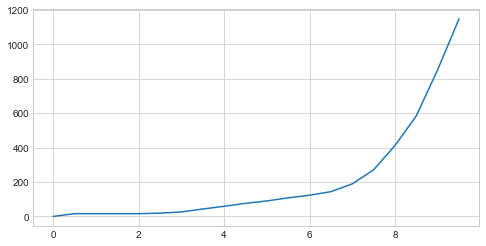

In [225]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.plot(time_interval, num_crash_event)

In [12]:
####### give a threshold of a time interval between two consecutive crashes within one trial #######  
####### how to set up the threshold? 1) how much time it will take to reset the machine??? 

crash_excludeShortT = pd.DataFrame()
for x in range(len(peopleTrialHasCrash)):
    trial = peopleTrialHasCrash[x]
    df = crash_event[crash_event.peopleTrialKey == trial]
    df['seconds_shift'] = df['seconds'].shift(1)
    df.fillna(0, inplace=True)
    df['time_gap'] = df['seconds'] - df['seconds_shift']
    # now we try to set as 2 seconds as a short-time crash
    df = df[df.time_gap > 2]
    crash_excludeShortT = pd.concat([crash_excludeShortT, df])
    
    
#     for i in range(len(df)):
#         sec_1 = df.seconds_shift.iloc[i]
#         sec_2 = df.seconds.iloc[i] 
#         temp = data_needed[ (data_needed.peopleTrialKey == trial ) &\
#          (data_needed.seconds > sec_1) & (data_needed.seconds <= sec_2 ) ] 
#         crash_event_withInfo = pd.concat([crash_event_withInfo,temp])

In [13]:
len(crash_excludeShortT)

6235

In [14]:
crash_excludeShortT.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey,crash,seconds_shift,time_gap
datetimeNew,,,,,,,,,,,,
1970-01-01 00:00:22.398,22.398,4,59.436035,94.134567,94.482422,-0.880920,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0,0.000,22.398
1970-01-01 00:00:35.087,35.087,4,-60.455017,-11.415452,-27.122498,0.843781,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0,22.398,12.689
1970-01-01 00:01:11.218,71.218,4,-60.578613,2.456897,-23.689270,0.820343,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0,35.087,36.131
1970-01-01 00:01:27.480,87.480,4,60.262756,44.052488,29.182434,-0.579346,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0,71.218,16.262
1970-01-01 00:01:37.565,97.565,4,-60.367126,-27.508665,-36.735535,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0,87.480,10.085


In [207]:
print('There are %s crash events that have less than 7 seconds time interval between next crash'\
      % (len(crash_event) - len(crash_excludeShortT)))

There are 189 crash events that have less than 7 seconds time interval between next crash


In [183]:
print('There are %s crash events that have less than 5 seconds time interval between next crash'\
      % (len(crash_event) - len(crash_excludeShortT)))

There are 90 crash events that have less than 5 seconds time interval between next crash


In [245]:
print('There are %s crash events that have less than 3 seconds time interval between next crash'\
      % (len(crash_event) - len(crash_excludeShortT)))

There are 26 crash events that have less than 3 seconds time interval between next crash


## Checking resampling & interplotation 

### method 1 -- pandas resampling

3943
5230
4377
3996


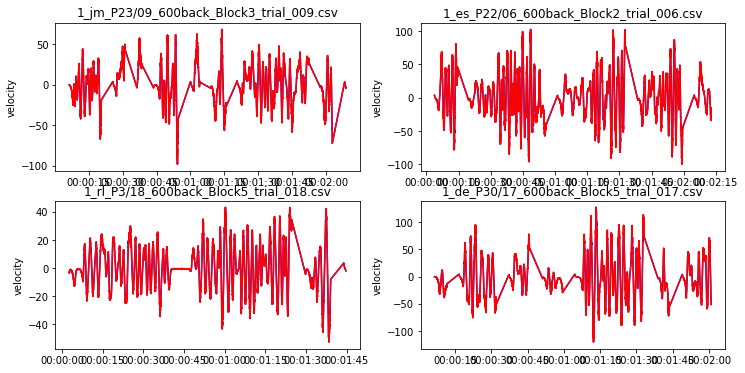

In [36]:
random_path2 = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(12,6), squeeze = False)
for i, path in enumerate(random_path2):
    data = data_needed[data_needed.peopleTrialKey == path]
    data = data[['seconds', 'currentPosRoll','currentVelRoll','calculated_vel','joystickX']]
    data_resample = data.resample('0.001S').asfreq().interpolate(method='linear')
    x1 = data.index
    x2 = data_resample.index
    y1 = data.calculated_vel
    print(len(y1))
    y2 = data_resample.calculated_vel
    ax = axes[i//2, i%2]
    ax.plot(x1,y1,color='blue')
    ax.plot(x2,y2,color='red')
    ax.set_title(path)
    ax.set_ylabel("velocity")

3725
4560
3481
4782


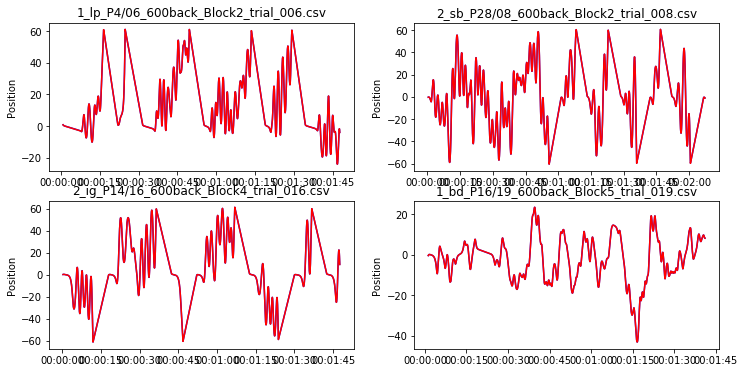

In [35]:
random_path2 = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(12,6), squeeze = False)
for i, path in enumerate(random_path2):
    data = data_needed[data_needed.peopleTrialKey == path]
    data = data[['seconds', 'currentPosRoll','currentVelRoll','calculated_vel','joystickX']]
    data_resample = data.resample('0.001S').asfreq().interpolate(method='linear')
    x1 = data.index
    x2 = data_resample.index
    y1 = data.currentPosRoll
    print(len(y1))
    y2 = data_resample.currentPosRoll
    ax = axes[i//2, i%2]
    ax.plot(x1,y1,color='blue')
    ax.plot(x2,y2,color='red')
    ax.set_title(path)
    ax.set_ylabel("Position")

From the above pictures, we can see our resample methods works well. However, the data still gonna be in different length, since  
 e.x.1: from 1.003 seconds to 1.500 seconds, there would be 498 sampling rate;   
 e.x.2: from 1.005 seconds to 1.500 seconds, there would be 496 sampling rate;

### method 2 -- numpy & scipy 

24
23
25
23


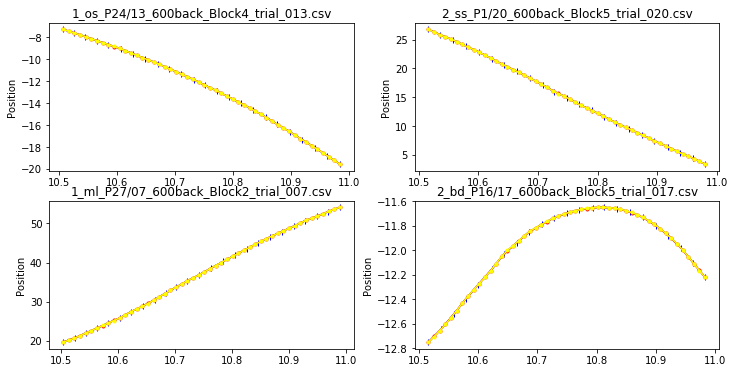

In [46]:
random_path2 = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(12,6), squeeze = False)
for i, path in enumerate(random_path2):
    data = data_needed[data_needed.peopleTrialKey == path]
    data = data[['seconds', 'currentPosRoll','currentVelRoll','calculated_vel','joystickX']]
    data = data[(data.index>="1970-01-01 00:00:10.500") & (data.index<="1970-01-01 00:00:11.000")]
    x1 = data.seconds
    y1 = data.currentPosRoll
    print(len(y1))
    new_length = 50
    new_x1 = np.linspace(x1.min(), x1.max(), new_length)
    new_y1 = sp.interpolate.interp1d(x1, y1, kind='linear')(new_x1)
    new_y2 = sp.interpolate.interp1d(x1, y1, kind='quadratic')(new_x1)
    ax = axes[i//2, i%2]
    ax.plot(x1, y1, marker = '|', color='blue')
    ax.plot(new_x1, new_y1, marker = '.', color='red')
    ax.plot(new_x1, new_y2, marker = '.', color='yellow')
    ax.set_title(path)
    ax.set_ylabel("Position")

23
24
24
24


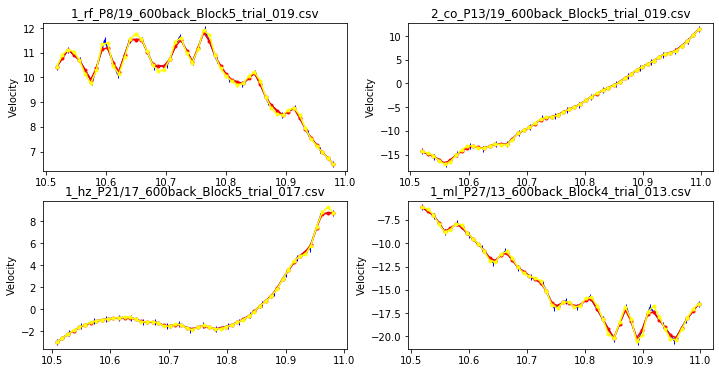

In [43]:
random_path2 = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(12,6), squeeze = False)
for i, path in enumerate(random_path2):
    data = data_needed[data_needed.peopleTrialKey == path]
    data = data[['seconds', 'currentPosRoll','currentVelRoll','calculated_vel','joystickX']]
    data = data[(data.index>="1970-01-01 00:00:10.500") & (data.index<="1970-01-01 00:00:11.000")]
    x1 = data.seconds
    y1 = data.calculated_vel
    print(len(y1))
    new_length = 50
    new_x1 = np.linspace(x1.min(), x1.max(), new_length)
    new_y1 = sp.interpolate.interp1d(x1, y1, kind='linear')(new_x1)
    new_y2 = sp.interpolate.interp1d(x1, y1, kind='quadratic')(new_x1)
    ax = axes[i//2, i%2]
    ax.plot(x1, y1, marker = '|', color='blue')
    ax.plot(new_x1, new_y1, marker = '.', color='red')
    ax.plot(new_x1, new_y2, marker = '.', color='yellow')
    ax.set_title(path)
    ax.set_ylabel("Velocity")

This method works very well too! And one benefit of this is that we could make the sampling rate fixed. So I decided to use this method while do feature engineering. Also I tried both linear and quadratic interplote methods, but there's no big difference, even though the quadratic is a little bit smoother. In the end, I choose the linear method to do interplotation.

## Get the crash event label and features

In [25]:
np.set_printoptions(suppress=True)
####### crash event data info with features within 300 ms previous data ######
time_scale_train = 0.5
time_ahead = 0.3
sampling_rate = 50
crash_feature_label_300ms_500ms_test = pd.DataFrame()
peopleTrialHasCrash_ex = crash_excludeShortT.peopleTrialKey.unique()
for num in range(len(peopleTrialHasCrash)):
    j = peopleTrialHasCrash[num]
    print(num)
    for i in (crash_excludeShortT.loc[
                        ((crash_excludeShortT['peopleTrialKey'] == j)),'seconds']):
        
        temp_df = pd.concat([data_needed[(data_needed.seconds <= i - time_ahead) &\
                        (data_needed.seconds >= i - time_scale_train - time_ahead) \
                      &(data_needed['peopleTrialKey'] == j)]]) 
        
        ##### resample & interpolate
        temp_df = temp_df[['seconds', 'currentVelRoll','currentPosRoll','calculated_vel','joystickX','peopleTrialKey']]
        x = temp_df.seconds
        y_calculated_vel = temp_df.calculated_vel
        y_org_vel = temp_df.currentVelRoll
        y_currentPosRoll = temp_df.currentPosRoll
        y_joystickX = temp_df.joystickX
        
        
        new_x = np.linspace(x.min(), x.max(), sampling_rate)
        new_y_calculated_vel = sp.interpolate.interp1d(x, y_calculated_vel, kind='linear')(new_x)
        new_y_original_vel = sp.interpolate.interp1d(x, y_org_vel, kind='linear')(new_x)
        new_y_currentPosRoll = sp.interpolate.interp1d(x, y_currentPosRoll, kind='linear')(new_x)
        new_y_joystickX = sp.interpolate.interp1d(x, y_joystickX, kind='linear')(new_x)
        
        

        arr1 = np.dstack([new_y_calculated_vel, new_y_currentPosRoll, new_y_joystickX]).reshape(sampling_rate,3)
        arr2 = np.dstack([new_y_original_vel, new_y_currentPosRoll, new_y_joystickX]).reshape(sampling_rate,3)
        arr3 = 1
        arr4 = temp_df['peopleTrialKey'].iloc[0]
        arr5 = temp_df['seconds'].iloc[0]
        arr6 = temp_df['seconds'].iloc[-1]
        
        crash_feature_label_300ms_500ms_test = pd.concat(\
                            [crash_feature_label_300ms_500ms_test, pd.DataFrame([[arr1, arr2, arr3, arr4, arr5, arr6]],\
                            columns=["features_cal_vel","features_org_vel",'label', 'peopleTrialKey', 'start_seconds', 'end_seconds']) ])                           

In [12]:
# crash_feature_label_300ms_500ms_test.to_pickle('crash_feature_label_300ms_500ms_test')
crash_feature_label_300ms_500ms = pd.read_pickle('crash_feature_label_300ms_500ms_test')
crash_feature_label_300ms_500ms.head()

,features_cal_vel,features_org_vel,label,peopleTrialKey,start_seconds,end_seconds
0,"[[-28.464577414774713, 51.1962890625, -0.34918...","[[-40.039914, 51.1962890625, -0.349182], [-39....",1,1_co_P13/12_600back_Block3_trial_012.csv,21.600,22.077
0,"[[-50.81176757811706, -33.7417602539063, 0.640...","[[-39.396185, -33.7417602539063, 0.640656], [-...",1,1_co_P13/12_600back_Block3_trial_012.csv,34.298,34.780
0,"[[0.2496892755681186, -34.5712280273438, 0.054...","[[-29.26819, -34.5712280273438, 0.054718], [-3...",1,1_co_P13/12_600back_Block3_trial_012.csv,70.438,70.917
0,"[[-4.970005580356955, 48.592529296875, -0.5475...","[[-2.875321, 48.592529296875, -0.5475770000000...",1,1_co_P13/12_600back_Block3_trial_012.csv,86.681,87.162
0,"[[-12.425013950898428, -36.5240478515625, 0.32...","[[-12.187927, -36.5240478515625, 0.320343], [-...",1,1_co_P13/12_600back_Block3_trial_012.csv,96.783,97.265


In [13]:
len(crash_feature_label_300ms_500ms)

6235

In [15]:
leng = []
for i in range(len(crash_feature_label_300ms_500ms)):
    leng.append(crash_feature_label_300ms_500ms.features_org_vel.iloc[i].shape[0])
set(leng)

{50}

I found that all the sampling rates are the same for each case, bingo!

In [12]:
#### Check the length distribution of series
len_distribution = []
for i in range(len(crash_feature_label_300ms_500ms)):
    len_distribution.append(crash_feature_label_300ms_500ms.features.iloc[i].shape)
tmp = pd.Series(len_distribution)
tmp.describe()

count        6251
unique          5
top       (24, 4)
freq         4432
dtype: object

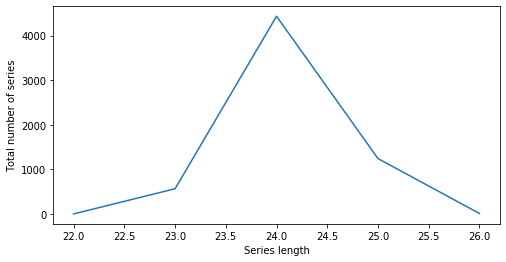

In [26]:
unique_pair = set(tmp)
num_pair = {}
for i in unique_pair:
    num_pair[i[0]]= sum((tmp.isin([i])))
num_pair


lists = sorted(num_pair.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.xlabel('Series length')
plt.ylabel('Total number of series')
plt.show() ### sampling rate 

## Get all non crash event with label and features

In [59]:
####### define my own sliding window function
def sliding_window(data, buck_size, step):
    list_all = []
    temp_len = len(data[data.between(data.iloc[0], data.iloc[0] + buck_size)])
    for i in range(len(data)): 
        left = data.iloc[i] + i * step 
        right = data.iloc[i] + i * step  + buck_size
        series1 = data[data.between(left, right)] 
        if data.iloc[-1] - left < 0.5:
            break
        list_all.append(series1)
    return list_all

In [26]:
np.set_printoptions(suppress=True)
####### crash event data info with features within 0.5 second previous data ######
time_scale_train = 0.5
time_ahead = 0.3
time_step = 0.3
sampling_rate = 50
peopleTrialHasCrash_ex = crash_excludeShortT.peopleTrialKey.unique()

noncrash_feature_label_300ms_500ms_test = pd.DataFrame()
for num in range(len(peopleTrialHasCrash_ex)):
    j = peopleTrialHasCrash_ex[num]
    print(num) 
    df = crash_excludeShortT[crash_excludeShortT.peopleTrialKey == j]
    df['seconds_shift'] = df['seconds'].shift(1)
    df.fillna(0, inplace=True)
    df['time_gap'] = df['seconds'] - df['seconds_shift']
    
    df_trial = data_needed[(data_needed['peopleTrialKey'] == j)]

    for i in (crash_excludeShortT.loc[
                        (crash_excludeShortT['peopleTrialKey'] == j),'seconds']):
        left = df.seconds_shift[df.seconds==i].iloc[0] 
        right = i - time_scale_train - time_ahead
        noncrash_time_range = [left, right]

        temp_serie = data_needed.loc[(data_needed.seconds>=left) & (data_needed.seconds<=right) \
                      &(data_needed['peopleTrialKey'] == j),'seconds'] 
        
        list_all = sliding_window(temp_serie, time_scale_train, time_step) 

        
        for x in range(len(list_all)):
            temp_df = df_trial[(df_trial.seconds >= list_all[x].iloc[0])\
                           & (df_trial.seconds <= list_all[x].iloc[-1])]
    
            ##### resample & interpolate
            temp_df = temp_df[['seconds', 'currentVelRoll', 'currentPosRoll','calculated_vel','joystickX','peopleTrialKey']]
            x = temp_df.seconds
            y_calculated_vel = temp_df.calculated_vel
            y_org_vel = temp_df.currentVelRoll
            y_currentPosRoll = temp_df.currentPosRoll
            y_joystickX = temp_df.joystickX

            new_x = np.linspace(x.min(), x.max(), sampling_rate)
            new_y_calculated_vel = sp.interpolate.interp1d(x, y_calculated_vel, kind='linear')(new_x)
            new_y_original_vel = sp.interpolate.interp1d(x, y_org_vel, kind='linear')(new_x)
            new_y_currentPosRoll = sp.interpolate.interp1d(x, y_currentPosRoll, kind='linear')(new_x)
            new_y_joystickX = sp.interpolate.interp1d(x, y_joystickX, kind='linear')(new_x)



            arr1 = np.dstack([new_y_calculated_vel, new_y_currentPosRoll, new_y_joystickX]).reshape(sampling_rate,3)
            arr2 = np.dstack([new_y_original_vel, new_y_currentPosRoll, new_y_joystickX]).reshape(sampling_rate,3)
            arr3 = 0
            arr4 = temp_df['peopleTrialKey'].iloc[0]
            arr5 = temp_df['seconds'].iloc[0]
            arr6 = temp_df['seconds'].iloc[-1]
        
            noncrash_feature_label_300ms_500ms_test = pd.concat(\
                            [noncrash_feature_label_300ms_500ms_test, pd.DataFrame([[arr1, arr2, arr3, arr4, arr5, arr6]],\
                            columns=["features_cal_vel","features_org_vel",'label', 'peopleTrialKey', 'start_seconds', 'end_seconds']) ]) 
  
                          

In [7]:
# noncrash_feature_label_300ms_500ms_test.to_pickle('noncrash_feature_label_300ms_500ms_test')
noncrash_feature_label_300ms_500ms = pd.read_pickle('noncrash_feature_label_300ms_500ms_test')
noncrash_feature_label_300ms_500ms.head()

,features_cal_vel,features_org_vel,label,peopleTrialKey,start_seconds,end_seconds
0,"[[3.662109374999952, -0.8294677734375, -0.0], ...","[[0.0, -0.8294677734375, -0.0], [-0.0812428639...",0,1_co_P13/12_600back_Block3_trial_012.csv,1.774,2.261
0,"[[0.2496892755681841, -0.27191162109375, -0.0]...","[[-1.201627, -0.27191162109375, -0.0], [-1.222...",0,1_co_P13/12_600back_Block3_trial_012.csv,2.097,2.594
0,"[[-1.2484463778408954, -0.48614501953125, -0.0...","[[-1.974101, -0.48614501953125, -0.0], [-2.034...",0,1_co_P13/12_600back_Block3_trial_012.csv,2.430,2.912
0,"[[-2.496892755681841, -1.07940673828125, -0.0]...","[[-3.519049, -1.07940673828125, -0.0], [-3.579...",0,1_co_P13/12_600back_Block3_trial_012.csv,2.744,3.228
0,"[[-4.2989979619564975, -2.2686767578125, -0.0]...","[[-6.651861, -2.2686767578125, -0.0], [-6.7160...",0,1_co_P13/12_600back_Block3_trial_012.csv,3.082,3.546


In [8]:
len(noncrash_feature_label_300ms_500ms)

205069

In [11]:
leng2 = []
for i in range(len(noncrash_feature_label_300ms_500ms)):
    leng2.append(noncrash_feature_label_300ms_500ms.features_org_vel.iloc[i].shape[0])
set(leng2)

{50}

In [16]:
data_final = pd.concat([crash_feature_label_300ms_500ms, noncrash_feature_label_300ms_500ms])
data_final = data_final[['features_cal_vel','label']]
data_final.head()

,features_cal_vel,label
0,"[[-28.464577414774713, 51.1962890625, -0.34918...",1
0,"[[-50.81176757811706, -33.7417602539063, 0.640...",1
0,"[[0.2496892755681186, -34.5712280273438, 0.054...",1
0,"[[-4.970005580356955, 48.592529296875, -0.5475...",1
0,"[[-12.425013950898428, -36.5240478515625, 0.32...",1


In [34]:
records = pd.concat([crash_feature_label_300ms_500ms, noncrash_feature_label_300ms_500ms])
records.head()

,features_cal_vel,features_org_vel,label,peopleTrialKey,start_seconds,end_seconds
0,"[[-28.464577414774713, 51.1962890625, -0.34918...","[[-40.039914, 51.1962890625, -0.349182], [-39....",1,1_co_P13/12_600back_Block3_trial_012.csv,21.600,22.077
0,"[[-50.81176757811706, -33.7417602539063, 0.640...","[[-39.396185, -33.7417602539063, 0.640656], [-...",1,1_co_P13/12_600back_Block3_trial_012.csv,34.298,34.780
0,"[[0.2496892755681186, -34.5712280273438, 0.054...","[[-29.26819, -34.5712280273438, 0.054718], [-3...",1,1_co_P13/12_600back_Block3_trial_012.csv,70.438,70.917
0,"[[-4.970005580356955, 48.592529296875, -0.5475...","[[-2.875321, 48.592529296875, -0.5475770000000...",1,1_co_P13/12_600back_Block3_trial_012.csv,86.681,87.162
0,"[[-12.425013950898428, -36.5240478515625, 0.32...","[[-12.187927, -36.5240478515625, 0.320343], [-...",1,1_co_P13/12_600back_Block3_trial_012.csv,96.783,97.265


In [41]:
training_all = records.iloc[:, [0,1,3,4,5]]
testing_all = records.iloc[:,2]
training.head()

,features_cal_vel,features_org_vel,peopleTrialKey,start_seconds,end_seconds
0,"[[-28.464577414774713, 51.1962890625, -0.34918...","[[-40.039914, 51.1962890625, -0.349182], [-39....",1_co_P13/12_600back_Block3_trial_012.csv,21.600,22.077
0,"[[-50.81176757811706, -33.7417602539063, 0.640...","[[-39.396185, -33.7417602539063, 0.640656], [-...",1_co_P13/12_600back_Block3_trial_012.csv,34.298,34.780
0,"[[0.2496892755681186, -34.5712280273438, 0.054...","[[-29.26819, -34.5712280273438, 0.054718], [-3...",1_co_P13/12_600back_Block3_trial_012.csv,70.438,70.917
0,"[[-4.970005580356955, 48.592529296875, -0.5475...","[[-2.875321, 48.592529296875, -0.5475770000000...",1_co_P13/12_600back_Block3_trial_012.csv,86.681,87.162
0,"[[-12.425013950898428, -36.5240478515625, 0.32...","[[-12.187927, -36.5240478515625, 0.320343], [-...",1_co_P13/12_600back_Block3_trial_012.csv,96.783,97.265


In [42]:
train_X, test_X, train_y, test_y = train_test_split(training_all, testing_all, test_size=0.2, random_state=42)

In [43]:
train_X.head()

,features_cal_vel,features_org_vel,peopleTrialKey,start_seconds,end_seconds
0,"[[19.35686383928498, 37.1585083007813, -0.2380...","[[27.406742, 37.1585083007813, -0.238068], [28...",1_at_P19/19_600back_Block5_trial_019.csv,18.769,19.250
0,"[[-0.5493164062499142, -0.142822265625, -0.0],...","[[-0.6866439999999999, -0.142822265625, -0.0],...",2_ig_P14/08_600back_Block2_trial_008.csv,43.366,43.849
0,"[[65.66827947441519, 32.0965576171875, -0.9205...","[[33.967408, 32.0965576171875, -0.920593], [31...",2_fa_P17/07_600back_Block2_trial_007.csv,52.161,52.626
0,"[[39.07637162642544, 13.7521362304688, -0.4682...","[[42.180311, 13.7521362304688, -0.468231000000...",2_xz_P11/14_600back_Block4_trial_014.csv,25.620,26.100
0,"[[36.49030412946527, -33.28857421875, -0.03225...","[[38.575431, -33.28857421875, -0.032257], [36....",2_ss_P1/19_600back_Block5_trial_019.csv,33.592,34.062


In [44]:
train_y.head()

0    1
0    0
0    0
0    0
0    0
Name: label, dtype: int64

## LSTM Model 

In [5]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

In [46]:
# X = data_final.features_cal_vel
# X = np.array([np.vstack(i) for i in X])
# y = np.array(data_final.label)
train_X_final = np.array([np.vstack(i) for i in train_X.features_org_vel])
test_X_final = np.array([np.vstack(i) for i in test_X.features_org_vel])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_X_final, test_X_final, train_y, test_y

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((169043, 50, 3), (169043,), (42261, 50, 3), (42261,))

In [47]:
X_train = sequence.pad_sequences(X_train, maxlen=50, padding='post', dtype='float', truncating='post')
y_train = np.array(y_train).reshape(len(y_train),1)

X_test = sequence.pad_sequences(X_test, maxlen=50, padding='post', dtype='float', truncating='post')
y_test = np.array(y_test).reshape(len(y_test),1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((169043, 50, 3), (169043, 1), (42261, 50, 3), (42261, 1))

In [48]:
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [49]:
y_test.shape

(42261, 2)

In [50]:
len(y_test[y_test[:,0] ==0])

1208

In [51]:
### train model
import keras
model = keras.Sequential()
model.add(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )

model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['categorical_accuracy']
)

In [52]:
class_weights ={
    0:1,
    1:1
}

history = model.fit(
    X_train, y_train,
    epochs=1,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    class_weight = class_weights
)


4755/4755 [==============================] - 153s 32ms/step - loss: 0.0278 - categorical_accuracy: 0.9888 - val_loss: 0.0207 - val_categorical_accuracy: 0.9901


In [53]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1321/1321 [==============================] - 15s 12ms/step - loss: 0.0208 - categorical_accuracy: 0.9898


In [54]:
y_pred.shape

(42261, 2)

In [55]:
predictions = y_pred[:,0]
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

testing = y_test[:,0]

len(predictions), len(testing)
# an_array = np.where(an_array > 20, 0, an_array)

(42261, 42261)

In [63]:
len(predictions[predictions==0])

1207

In [65]:
validation_final = test_X
validation_final['prediction'] = predictions_org
validation_final['ground_truth'] = testing_org
len(validation_final)
# validation_final.head()

42261

In [72]:
validation_final_2 = validation_final[(validation_final.prediction != validation_final.ground_truth) \
                     & (validation_final.ground_truth==1.0)].iloc[:,2:]
validation_final_2

,peopleTrialKey,start_seconds,end_seconds,prediction,ground_truth
0,2_ir_P5/10_600back_Block3_trial_010.csv,35.857,36.322,0.0,1.0
0,2_os_P24/06_600back_Block2_trial_006.csv,70.433,70.898,0.0,1.0
0,2_mc_P18/08_600back_Block2_trial_008.csv,79.085,79.559,0.0,1.0
0,1_js_P32/05_600back_Block2_trial_005.csv,80.051,80.524,0.0,1.0
0,1_js_P9/03_600back_Block1_trial_003.csv,77.802,78.297,0.0,1.0
...,...,...,...,...,...
0,2_sb_P28/02_600back_Block1_trial_002.csv,10.865,11.338,0.0,1.0
0,2_js_P9/13_600back_Block4_trial_013.csv,30.094,30.577,0.0,1.0
0,1_js_P9/18_600back_Block5_trial_018.csv,53.507,53.977,0.0,1.0
0,1_de_P30/06_600back_Block2_trial_006.csv,111.775,112.254,0.0,1.0


In [69]:
from sklearn.metrics import confusion_matrix
cf_array = confusion_matrix(testing, predictions)
cf_array

array([[  992,   216],
       [  215, 40838]])

In [31]:
np.sum(cf_array)

42261

In [40]:
aa = pd.DataFrame(cf_array)

In [41]:
aa['accuracy'] = (aa.iloc[0,0] + aa.iloc[1,1])/np.sum(cf_array)
aa['recall']  = aa.iloc[0,0]/(aa.iloc[0,0] + aa.iloc[0,1])
aa['precision']  = aa.iloc[0,0]/(aa.iloc[0,0] + aa.iloc[1,0])

In [42]:
aa.to_csv('yyy.csv')
yyy = pd.read_csv('yyy.csv')
yyy

,Unnamed: 0,0,1,accuracy,recall,precision
0,0,1021,187,0.989849,0.845199,0.808393
1,1,242,40811,0.989849,0.845199,0.808393


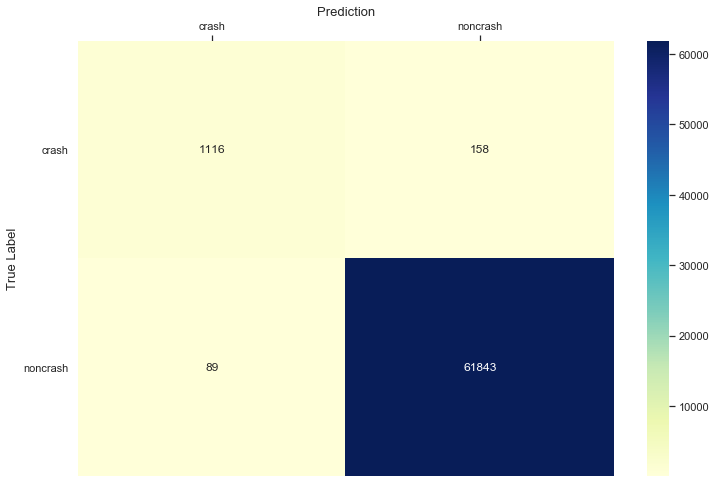

In [33]:
import seaborn as sns
sns.set()
df_cm = pd.DataFrame(cf_array, index = ['crash', 'noncrash'],
                  columns = ['crash', 'noncrash'])
plt.figure(figsize = (12,8))
ax = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
plt.title('Prediction', fontsize = 13)
plt.yticks(rotation=0)
plt.ylabel('True Label', fontsize = 13)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

In [35]:
### train model
import keras
model2 = keras.Sequential()
model2.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model2.add(keras.layers.Dropout(rate=0.5))
model2.add(keras.layers.Dense(units=128, activation='relu'))
model2.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['categorical_accuracy']
)

In [39]:
class_weights ={
    0:1,
    1:10
}

history = model2.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    class_weight = class_weights
)

Epoch 1/15
7111/7111 [==============================] - 652s 92ms/step - loss: 0.1018 - categorical_accuracy: 0.9780 - val_loss: 0.0275 - val_categorical_accuracy: 0.9877
Epoch 2/15
7111/7111 [==============================] - 665s 94ms/step - loss: 0.0651 - categorical_accuracy: 0.9853 - val_loss: 0.0264 - val_categorical_accuracy: 0.9900
Epoch 3/15
7111/7111 [==============================] - 666s 94ms/step - loss: 0.0543 - categorical_accuracy: 0.9883 - val_loss: 0.0539 - val_categorical_accuracy: 0.9805
Epoch 4/15
7111/7111 [==============================] - 669s 94ms/step - loss: 0.0513 - categorical_accuracy: 0.9889 - val_loss: 0.0263 - val_categorical_accuracy: 0.9902
Epoch 5/15
7111/7111 [==============================] - 669s 94ms/step - loss: 0.0519 - categorical_accuracy: 0.9891 - val_loss: 0.0182 - val_categorical_accuracy: 0.9930
Epoch 6/15
7111/7111 [==============================] - 672s 94ms/step - loss: 0.0463 - categorical_accuracy: 0.9902 - val_loss: 0.0466 - val_cat

In [40]:
model2.evaluate(X_test, y_test)
y_pred2 = model.predict(X_test)

1976/1976 [==============================] - 57s 29ms/step - loss: 0.0216 - categorical_accuracy: 0.9928


In [47]:
predictions2 = y_pred2[:,0]
predictions2[predictions2>=0.5] = 1
predictions2[predictions2<0.5] = 0

testing = y_test[:,0]

len(predictions2), len(testing)
# an_array = np.where(an_array > 20, 0, an_array)

(63206, 63206)

In [48]:
from sklearn.metrics import confusion_matrix
cf_array2 = confusion_matrix(testing, predictions2)

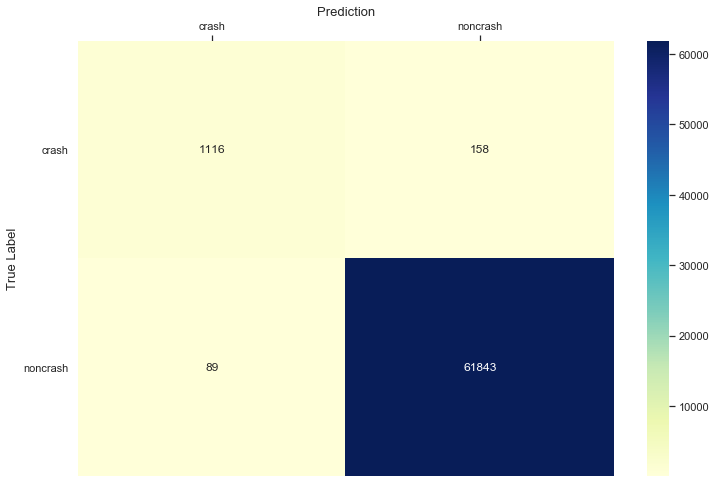

In [49]:
import seaborn as sns
sns.set()
df_cm = pd.DataFrame(cf_array2, index = ['crash', 'noncrash'],
                  columns = ['crash', 'noncrash'])
plt.figure(figsize = (12,8))
ax = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
plt.title('Prediction', fontsize = 13)
plt.yticks(rotation=0)
plt.ylabel('True Label', fontsize = 13)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

In [5]:
play = pd.read_pickle('data/crash_feature_label_500ms_500ms_test')
play.head()

,features_cal_vel,features_org_vel,label,peopleTrialKey,start_seconds,end_seconds
0,"[[-17.99011230469037, 55.5523681640625, 0.6586...","[[-29.826088, 55.5523681640625, 0.658691], [-3...",1,1_co_P13/12_600back_Block3_trial_012.csv,21.410,21.890
0,"[[-40.92407226563314, -24.06005859375, -0.4765...","[[-59.609261, -24.06005859375, -0.476593], [-5...",1,1_co_P13/12_600back_Block3_trial_012.csv,34.089,34.571
0,"[[26.916503906255354, -37.5238037109375, 0.031...","[[8.035878, -37.5238037109375, 0.031738], [6.1...",1,1_co_P13/12_600back_Block3_trial_012.csv,70.225,70.707
0,"[[-9.338378906251858, 49.8175048828125, 0.4047...","[[-5.5789800000000005, 49.8175048828125, 0.404...",1,1_co_P13/12_600back_Block3_trial_012.csv,86.491,86.976
0,"[[-9.363347833812755, -34.0493774414063, -0.32...","[[-12.831655, -34.0493774414063, -0.320343], [...",1,1_co_P13/12_600back_Block3_trial_012.csv,96.578,97.055


In [6]:
play1 = pd.read_pickle('data/noncrash_feature_label_500ms_500ms_test')
play1

,features_cal_vel,features_org_vel,label,peopleTrialKey,start_seconds,end_seconds
0,"[[3.662109374999952, -0.8294677734375, 0.0], [...","[[0.0, -0.8294677734375, 0.0], [-0.08124286394...",0,1_co_P13/12_600back_Block3_trial_012.csv,1.774,2.261
0,"[[0.2496892755681841, -0.27191162109375, 0.0],...","[[-1.201627, -0.27191162109375, 0.0], [-1.2223...",0,1_co_P13/12_600back_Block3_trial_012.csv,2.097,2.594
0,"[[-1.2484463778408954, -0.48614501953125, 0.0]...","[[-1.974101, -0.48614501953125, 0.0], [-2.0344...",0,1_co_P13/12_600back_Block3_trial_012.csv,2.430,2.912
0,"[[-2.496892755681841, -1.07940673828125, 0.0],...","[[-3.519049, -1.07940673828125, 0.0], [-3.5796...",0,1_co_P13/12_600back_Block3_trial_012.csv,2.744,3.228
0,"[[-4.2989979619564975, -2.2686767578125, 0.0],...","[[-6.651861, -2.2686767578125, 0.0], [-6.71602...",0,1_co_P13/12_600back_Block3_trial_012.csv,3.082,3.546
...,...,...,...,...,...,...
0,"[[-9.363347833806706, -11.0824584960938, -0.21...","[[-5.0639980000000016, -11.0824584960938, -0.2...",0,1_co_P13/12_600back_Block3_trial_012.csv,94.716,95.201
0,"[[-1.4981356534087116, -12.7496337890625, -0.1...","[[3.722897, -12.7496337890625, -0.195343], [4....",0,1_co_P13/12_600back_Block3_trial_012.csv,95.051,95.521
0,"[[-0.3745339133541968, -12.3843383789063, 0.20...","[[-11.286707, -12.3843383789063, 0.206329], [-...",0,1_co_P13/12_600back_Block3_trial_012.csv,95.372,95.838
0,"[[-29.251098632820806, -17.1414184570313, -0.4...","[[-38.323304, -17.1414184570313, -0.445343], [...",0,1_co_P13/12_600back_Block3_trial_012.csv,95.690,96.175


## Result Analysis

In [87]:
results_all = pd.read_csv('results_vis.csv')
results_all.head()

,Time_advanced,Velocity,Weights,Accuracy,Precision,Recall
0,300,Calculated,1',99.59,90.65,95.53
1,300,Calculated,10',98.80,70.44,99.83
2,300,Calculated,50',98.67,68.37,99.83
3,300,Calculated,100',96.72,46.62,100.00
4,300,Original,1',99.66,92.08,96.27


In [88]:
results_all['Weights'] = results_all['Weights'].astype('str')
# results_all['Time_advanced'] = results_all['Time_advanced'].astype('str')
# results_all = results_all.sort_values(by=['Time_advanced'])
results_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time_advanced  72 non-null     int64  
 1   Velocity       72 non-null     object 
 2   Weights        72 non-null     object 
 3   Accuracy       72 non-null     float64
 4   Precision      72 non-null     float64
 5   Recall         72 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.5+ KB


In [89]:
results_all.columns

Index(['Time_advanced', 'Velocity', 'Weights', 'Accuracy', 'Precision',
       'Recall'],
      dtype='object')

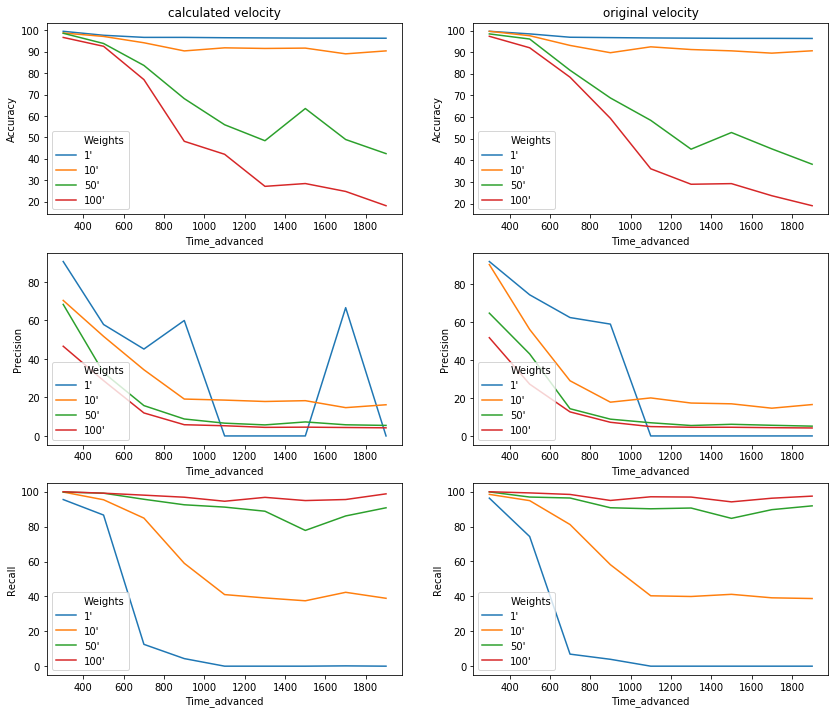

In [102]:
import seaborn as sns
calculated_results = results_all[results_all['Velocity']=='Calculated']
original_results = results_all[results_all['Velocity']=='Original']
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(14,12), squeeze = False)
ax1,ax2,ax3,ax4,ax5,ax6 = axes.ravel()




sns.lineplot(data=calculated_results, x="Time_advanced", y="Accuracy", hue="Weights", ax=ax1)
ax1.set_title('calculated velocity')
sns.lineplot(data=calculated_results, x="Time_advanced", y="Precision", hue="Weights", ax=ax3)
ax3.legend(loc='lower left')
sns.lineplot(data=calculated_results, x="Time_advanced", y="Recall", hue="Weights", ax=ax5)

sns.lineplot(data=original_results, x="Time_advanced", y="Accuracy", hue="Weights",  ax=ax2)
ax2.set_title('original velocity')

sns.lineplot(data=original_results, x="Time_advanced", y="Precision", hue="Weights", ax=ax4)
ax4.legend(loc='lower left')
sns.lineplot(data=original_results, x="Time_advanced", y="Recall", hue="Weights", ax=ax6)

plt.show()

## Result Analysis -- different train time scales

In [3]:
# os.getcwd()
results_timescales = pd.read_csv('results_timescales.csv')
results_timescales.head()

,Train_scale,Time_advanced,Weights,Accuracy,Precision,Recall
0,500ms,500,1',98.46,74.51,74.14
1,500ms,500,10',97.62,56.22,94.68
2,500ms,500,50',96.09,43.28,96.73
3,500ms,700,1',96.91,62.50,6.74
4,500ms,700,10',93.13,29.13,81.02


In [4]:
results_timescales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Train_scale    60 non-null     object 
 1   Time_advanced  60 non-null     int64  
 2   Weights        60 non-null     object 
 3   Accuracy       60 non-null     float64
 4   Precision      60 non-null     float64
 5   Recall         60 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


In [5]:
results_timescales.columns

Index(['Train_scale', 'Time_advanced', 'Weights', 'Accuracy', 'Precision',
       'Recall'],
      dtype='object')

In [6]:
import seaborn as sns
results_500 = results_timescales[results_timescales['Train_scale']=='500ms']
results_1000 = results_timescales[results_timescales['Train_scale']=='1000ms']
results_1500 = results_timescales[results_timescales['Train_scale']=='1500ms']
results_2000 = results_timescales[results_timescales['Train_scale']=='2000ms']

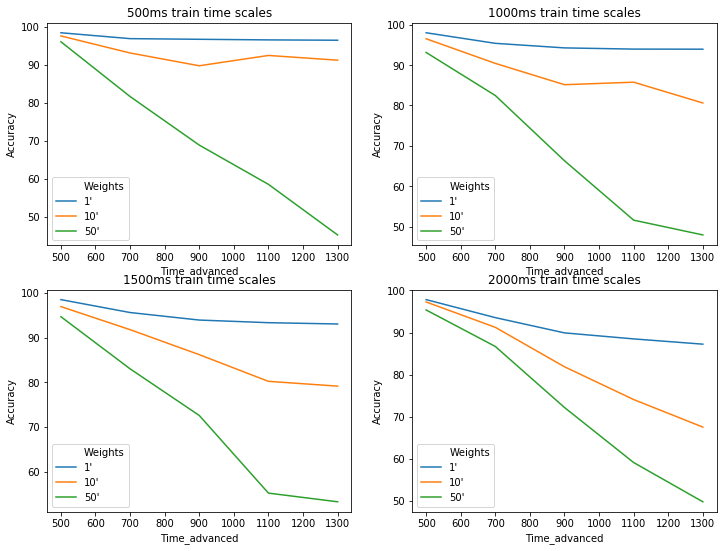

In [7]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,9), squeeze = False)
ax1,ax2,ax3,ax4 = axes.ravel()


sns.lineplot(data=results_500, x="Time_advanced", y="Accuracy", hue="Weights", ax=ax1)
ax1.set_title('500ms train time scales')

sns.lineplot(data=results_1000, x="Time_advanced", y="Accuracy", hue="Weights", ax=ax2)
ax2.set_title('1000ms train time scales')

sns.lineplot(data=results_1500, x="Time_advanced", y="Accuracy", hue="Weights", ax=ax3)
ax3.set_title('1500ms train time scales')

sns.lineplot(data=results_2000, x="Time_advanced", y="Accuracy", hue="Weights", ax=ax4)
ax4.set_title('2000ms train time scales')

plt.show()



# ax3.legend(loc='lower left')
# sns.lineplot(data=calculated_results, x="Time_advanced", y="Recall", hue="Weights", ax=ax5)

# sns.lineplot(data=original_results, x="Time_advanced", y="Accuracy", hue="Weights",  ax=ax2)
# ax2.set_title('original velocity')

# sns.lineplot(data=original_results, x="Time_advanced", y="Precision", hue="Weights", ax=ax4)
# ax4.legend(loc='lower left')
# sns.lineplot(data=original_results, x="Time_advanced", y="Recall", hue="Weights", ax=ax6)



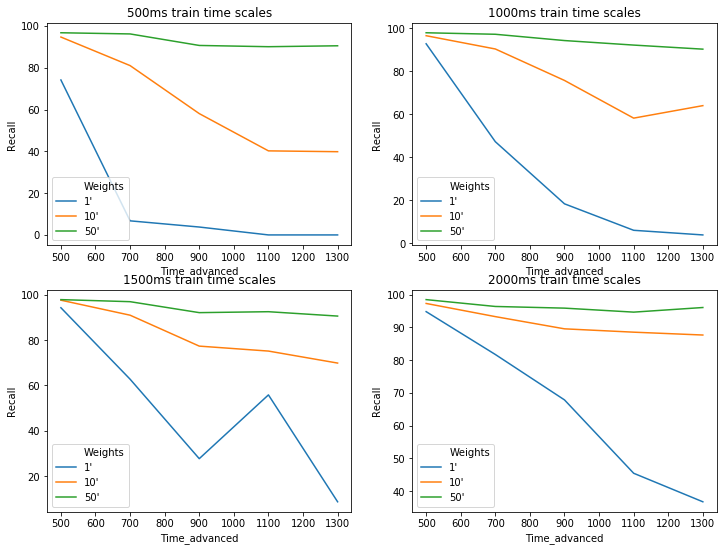

In [8]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,9), squeeze = False)
ax1,ax2,ax3,ax4 = axes.ravel()


sns.lineplot(data=results_500, x="Time_advanced", y="Recall", hue="Weights", ax=ax1)
ax1.set_title('500ms train time scales')

sns.lineplot(data=results_1000, x="Time_advanced", y="Recall", hue="Weights", ax=ax2)
ax2.set_title('1000ms train time scales')

sns.lineplot(data=results_1500, x="Time_advanced", y="Recall", hue="Weights", ax=ax3)
ax3.set_title('1500ms train time scales')

sns.lineplot(data=results_2000, x="Time_advanced", y="Recall", hue="Weights", ax=ax4)
ax4.set_title('2000ms train time scales')

plt.show()

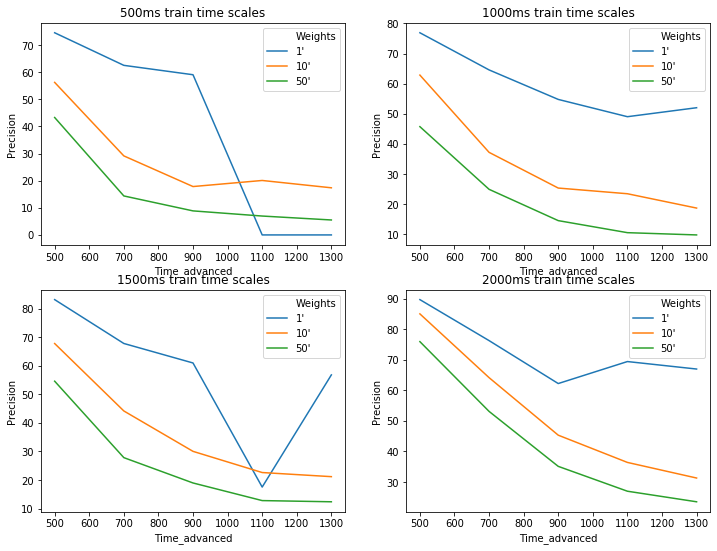

In [9]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,9), squeeze = False)
ax1,ax2,ax3,ax4 = axes.ravel()


sns.lineplot(data=results_500, x="Time_advanced", y="Precision", hue="Weights", ax=ax1)
ax1.set_title('500ms train time scales')

sns.lineplot(data=results_1000, x="Time_advanced", y="Precision", hue="Weights", ax=ax2)
ax2.set_title('1000ms train time scales')

sns.lineplot(data=results_1500, x="Time_advanced", y="Precision", hue="Weights", ax=ax3)
ax3.set_title('1500ms train time scales')

sns.lineplot(data=results_2000, x="Time_advanced", y="Precision", hue="Weights", ax=ax4)
ax4.set_title('2000ms train time scales')

plt.show()